## Feature Selection - Filtering Method

### Data Preprocessing

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

In [42]:
SourceFile = 'https://raw.githubusercontent.com/fufundany30/DigitalSkola-Capstone-Project/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(SourceFile)
df = df.drop(columns = 'id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [43]:
#mengganti nilai nan
df.bmi.fillna(df.bmi.mean(),inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [44]:
#Mengubah variabel kategorik dibawah menjadi values
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

gender_encode = LabelEncoder()
df['gender']=gender_encode.fit_transform(df['gender'])

ever_married_encode = LabelEncoder()
df['ever_married']=ever_married_encode.fit_transform(df['ever_married'])

work_type_encode = LabelEncoder()
df['work_type']=work_type_encode.fit_transform(df['work_type'])

Residence_type_encode = LabelEncoder()
df['Residence_type']=Residence_type_encode.fit_transform(df['Residence_type'])

smoking_status_encode = LabelEncoder()
df['smoking_status']=smoking_status_encode.fit_transform(df['smoking_status'])

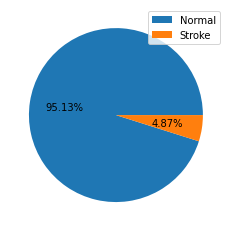

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

df_X = df.drop(['stroke'],axis=1)
df_y = df['stroke']

X = df_X.astype(float).values
y = df_y.astype(float).values
plt.pie(pd.DataFrame(y).value_counts(), autopct='%1.2f%%')
plt.legend(['Normal', 'Stroke'])
plt.show()

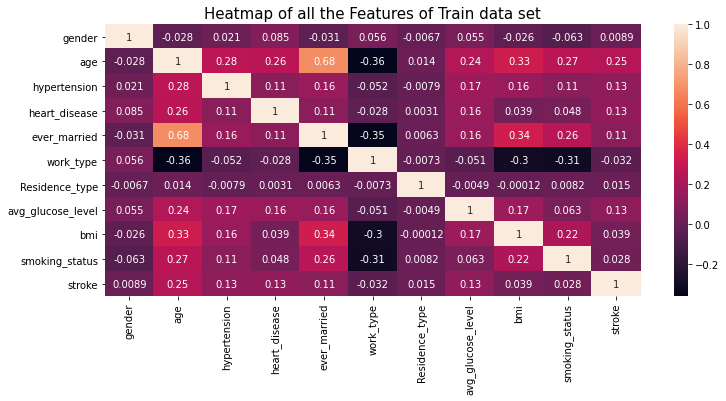

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.concat([df_X, df_y], axis=1)
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap of all the Features of Train data set", fontsize = 15);
plt.show()

In [47]:
df.corr().abs()['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.038947
work_type            0.032316
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
Name: stroke, dtype: float64

In [48]:
pip install imbalanced-learn

In [49]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### A. Model DT with all features

Accuracy : 96.95 %
Precision : 97.1 %
Recall : 96.98 %
Confusion matrix :
 [[1383   89]
 [   0 1445]]


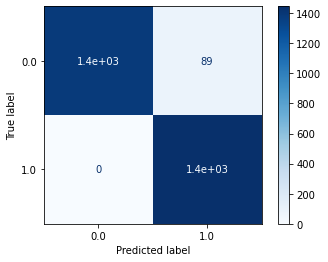

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#split dataset into features and target
df_X = df.drop(['stroke'],axis=1)
df_y = df['stroke']

X = df_X.astype(float).values
y = df_y.astype(float).values

#split dataset into training and test yet
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=123)

#build model
model=DecisionTreeClassifier(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#performance stats
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred,average='macro')
Recall = metrics.recall_score(y_test, y_pred,average='macro')

print('Accuracy :', round(Accuracy * 100,2),"%")    
print('Precision :', round(Precision * 100,2),"%")  
print('Recall :', round(Recall * 100,2),"%")
print('Confusion matrix :\n', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### B. Model DT with Filtering method using ANOVA

Sebelum feature selection (9722, 10)
Setelah feature selection (9722, 7)
Score of features :
 [4.12666033e+00 4.80651161e+03 5.58563319e+02 4.74151258e+02
 8.53168810e+02 6.17815130e+01 7.96776071e+00 6.45688770e+02
 7.40499147e+01 3.45078662e+01]
Score of features :
 [4.22397296e-002 0.00000000e+000 4.03886691e-120 1.10977099e-102
 7.50089925e-180 4.24504436e-015 4.77145489e-003 5.77004150e-138
 8.79716949e-018 4.38471174e-009]


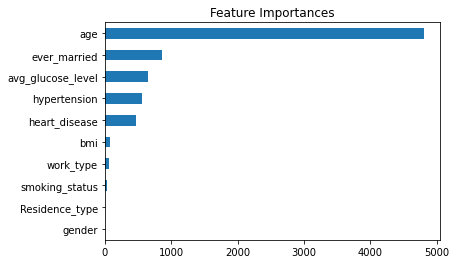

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif

#filtering method
filter = SelectKBest(f_classif, k=7)
X_new = filter.fit_transform(X_over,y_over)

print('Sebelum feature selection', X_over.shape)
print('Setelah feature selection', X_new.shape)
print('Score of features :\n', filter.scores_)
print('Score of features :\n', filter.pvalues_)

feat_importances = pd.Series(filter.scores_, index=df_X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

Accuracy : 96.78 %
Precision : 96.95 %
Recall : 96.81 %
Confusion matrix :
 [[1378   94]
 [   0 1445]]


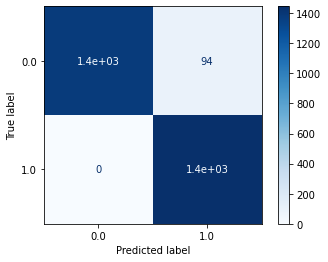

In [57]:
#split dataset into training and test yet
X_train, X_test, y_train, y_test = train_test_split(X_new, y_over, test_size=0.3, random_state=123)

#build model
model=DecisionTreeClassifier(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#performance stats
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred,average='macro')
Recall = metrics.recall_score(y_test, y_pred,average='macro')

print('Accuracy :', round(Accuracy * 100,2),"%")    
print('Precision :', round(Precision * 100,2),"%")  
print('Recall :', round(Recall * 100,2),"%")
print('Confusion matrix :\n', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### C. List of Optimal Features

Beberapa hasil performansi (accuracy) model DT berdasarkan jumlah features :
*   1 features = 96.20 %
*   2 features = 96.20 %
*   3 features = 92.80 %
*   4 features = 92.40 %
*   5 features = 92.67 %
*   6 features = 92.74 %

Saya memilih 3 feature karena balance dan related untuk case ini. beberapa feature yang optimal antara lain :
*   age
*   hypertension
*   avg glucose level




## Filtering Method - Embedded Method

### D. Model DT with Embedded Method

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

X = df_X.astype(float).values
y = df_y.astype(float).values

clf = ExtraTreesClassifier().fit(X_over,y_over)
embed = SelectFromModel(model, prefit=True)
X_new = embed.transform(X_over)

print('Sebelum feature selection :', X_over.shape)
print('Setelah feature selection :', X_new.shape)
print('Score of features :\n', clf.feature_importances_)
print('Mean of Feat Importance :', np.mean(clf.feature_importances_))
feat_importances = pd.Series(clf.feature_importances_, index=df_X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

ValueError: ignored

In [ ]:
#split dataset into training and test yet
X_train, X_test, y_train, y_test = train_test_split(X_new, y_over, test_size=0.3, random_state=123)

#build model
model=DecisionTreeClassifier(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#performance stats
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred,average='macro')
Recall = metrics.recall_score(y_test, y_pred,average='macro')

print('Accuracy :', round(Accuracy * 100,2),"%")    
print('Precision :', round(Precision * 100,2),"%")  
print('Recall :', round(Recall * 100,2),"%")
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### E. List of Optimal Features

Beberapa feature yang optimal antara lain :
* age
* gender
* ever married
* heart disease


